
## Autoencoders for Image Denoising
## Aim: To build an autoencoder model to denoise the input image and output a approximated clear image.

## Dataset: MNIST Dataset and Images of Narendra Modi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
import tensorflow as tf
from keras.datasets import mnist
import random
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

In [ ]:
data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train),(X_test, y_test) = data

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

In [ ]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train  =X_train.astype("float")/255
X_test =X_test.astype("float")/255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))

X_train size:  60000
X_test size:  10000


In [ ]:
X_train_noise = X_train + 0.75 * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
X_train_noise = np.clip(X_train_noise, 0., 1.)

In [ ]:
X_test_noise =X_test +0.75 *np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)
X_test_noise   =np.clip(X_test_noise, 0.,1.)

In [ ]:
def plot(img, p,labels= False):
  plt.figure(figsize= (20,20))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(img[i].reshape(28,28), cmap="binary")
    plt.xticks([])
    plt.yticks([])
    if labels:
      plt.xlabel(np.argmax(p[i]))
      plt.show()

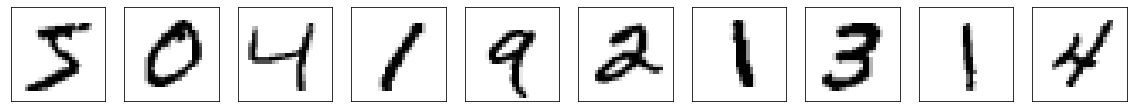

In [ ]:
plot(X_train, None)

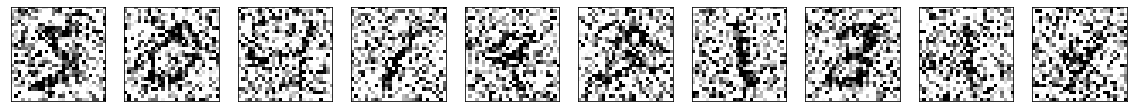

In [ ]:
plot(X_train_noise, None)

In [ ]:
input_image = Input(shape = (784,))

encode= Dense(512, activation ="relu")(input_image)
encode =Dense(512, activation ="relu")(encode)
encode= Dense(256, activation ="relu")(encode)
encode =Dense(256, activation ="relu")(encode)
encode= Dense(64, activation="relu")(encode)

decode = Dense(512, activation ="relu")(encode)
decode =Dense(784, activation="relu")(decode)

autoencoder =Model(input_image, decode)
autoencoder.compile(loss="binary_crossentropy", optimizer ="adam", metrics =["accuracy"])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 512)               33280 

In [ ]:
history = autoencoder.fit(X_train_noise, X_train, epochs=20, batch_size=500,
 shuffle = True, validation_data =(X_test_noise, X_test))

Epoch 1/20
120/120 [==============================] - 15s 120ms/step - loss: 0.4629 - accuracy: 0.0062 - val_loss: 0.3959 - val_accuracy: 0.0077
Epoch 2/20
120/120 [==============================] - 11s 91ms/step - loss: 0.3787 - accuracy: 0.0097 - val_loss: 0.3666 - val_accuracy: 0.0101
Epoch 3/20
120/120 [==============================] - 11s 93ms/step - loss: 0.3566 - accuracy: 0.0080 - val_loss: 0.3331 - val_accuracy: 0.0100
Epoch 4/20
120/120 [==============================] - 11s 90ms/step - loss: 0.3265 - accuracy: 0.0128 - val_loss: 0.3152 - val_accuracy: 0.0159
Epoch 5/20
120/120 [==============================] - 13s 108ms/step - loss: 0.3175 - accuracy: 0.0085 - val_loss: 0.3016 - val_accuracy: 0.0118
Epoch 6/20
120/120 [==============================] - 11s 92ms/step - loss: 0.3046 - accuracy: 0.0093 - val_loss: 0.2865 - val_accuracy: 0.0098
Epoch 7/20
120/120 [==============================] - 11s 91ms/step - loss: 0.2853 - accuracy: 0.0104 - val_loss: 0.2770 - val_accurac

In [ ]:
prediction = autoencoder.predict(X_test_noise)

313/313 [==============================] - 2s 6ms/step


Test Image


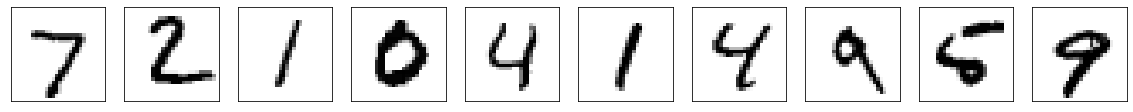

In [ ]:
print("Test Image")
plot(X_test, None)

Noisy Image


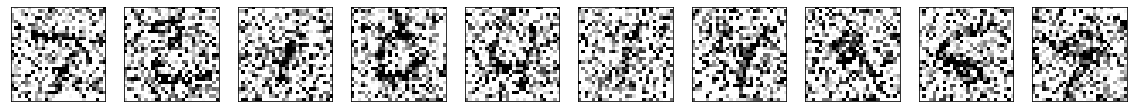

In [ ]:
print("Noisy Image")
plot(X_test_noise, None)

Denoised Image


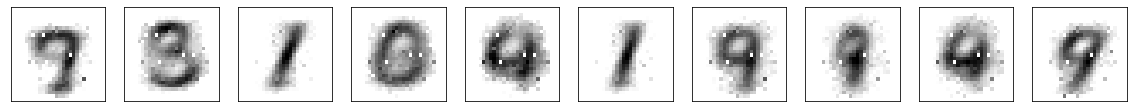

In [ ]:
print("Denoised Image")
plot(prediction, None)

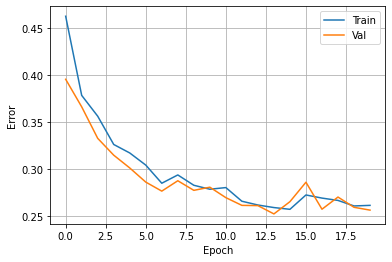

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

## Working on Image Datasets

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import matplotlib.pyplot as plt
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from skimage.util import random_noise
import glob
from tensorflow.keras import layers

In [ ]:
#splitfolders.ratio("/content/drive/MyDrive/Dl Images", output ="/content/drive/MyDrive/dataset", seed =42, ratio =(0.80,0.1,0.1))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen =ImageDataGenerator()
train_dataset = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                   batch_size =200,
                                                  target_size = (256,256),
                                                  shuffle =False)
train, _ = train_dataset.next()

valid_datagen =ImageDataGenerator()
valid_dataset = valid_datagen.flow_from_directory('/content/drive/MyDrive/dataset/val',
                                                  batch_size=200,
                                                    target_size = (256,256),
                                                  shuffle =False)
valid,_ = valid_dataset.next()

test_datagen = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory("/content/drive/MyDrive/dataset/test",
                                                batch_size =200,
                                                target_size = (256,256),
                                                shuffle =False)
test,_ = test_dataset.next()

Found 504 images belonging to 1 classes.
Found 63 images belonging to 1 classes.
Found 63 images belonging to 1 classes.


In [ ]:
# j =0
# for filename in glob.glob('/content/drive/MyDrive/dataset/train/Narendra_Modi/*.jpg'):
#   img = cv2.imread(filename)
#   a=filename.split('/')
#   n = a[-1]
#   #print(img.shape)
#   train_noise_img = random_noise(img, mode="s&p", amount= 0.08)
#   train_noise_img = np.array(255*train_noise_img, dtype= "uint8")
#   j+=1
#   cv2.imwrite("/content/drive/MyDrive/Train/Train Noise/"+str(n)+".jpg", train_noise_img)

In [ ]:
# j =0
# for filename in glob.glob('/content/drive/MyDrive/dataset/test/Narendra_Modi/*.jpg'):
#   img = cv2.imread(filename)
#   a=filename.split('/')
#   n = a[-1]
#   test_noise_img = random_noise(img, mode="s&p", amount= 0.08)
#   test_noise_img = np.array(255*test_noise_img, dtype= "uint8")
#   j+=1
#   cv2.imwrite("/content/drive/MyDrive/Test/Test Noise/"+str(n)+".jpg", test_noise_img)

In [ ]:
# j =0
# for filename in glob.glob('/content/drive/MyDrive/dataset/val/Narendra_Modi/*.jpg'):
#   img = cv2.imread(filename)
#   a=filename.split('/')
#   n = a[-1]

#   valid_noise_img = random_noise(img, mode="s&p", amount= 0.08)
#   valid_noise_img = np.array(255*valid_noise_img, dtype= "uint8")
#   j+=1
#   cv2.imwrite("/content/drive/MyDrive/Valid/Valid Noise/"+str(n)+".jpg", valid_noise_img)

In [ ]:
train_noise_datagen = ImageDataGenerator()
train_noise_data  = train_noise_datagen.flow_from_directory("/content/drive/MyDrive/Train",
                                                            batch_size = 200,
                                                            target_size = (256,256),
                                                            shuffle =False)
train_noise, _ = train_noise_data.next()

valid_noise_datagen =ImageDataGenerator()
valid_noise_data = valid_noise_datagen.flow_from_directory("/content/drive/MyDrive/Valid", batch_size = 200,
                                                           target_size = (256,256),
                                                           shuffle =False)
valid_noise, _ = valid_noise_data.next()


test_noise_datagen = ImageDataGenerator()
test_noise_data = test_noise_datagen.flow_from_directory("/content/drive/MyDrive/Test", batch_size = 200,
                                                         target_size = (256,256),
                                                         shuffle =False)
test_noise, _ = test_noise_data.next()

Found 504 images belonging to 1 classes.
Found 63 images belonging to 1 classes.
Found 63 images belonging to 1 classes.


In [ ]:
# datagen =ImageDataGenerator(rescale = 1./255.)

# x_test_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/test_noise',
#                                               batch_size=5,
#                                                   shuffle =True)
# x_test,_=x_test_dataset.next()
# x_train_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/train_noise',
#                                              batch_size=10,
#                                                   shuffle =True)
# x_train,_=x_train_dataset.next()
# x_val_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/val_noise',
#                                             batch_size=5,
#                                                   shuffle =True)
# x_val,_=x_val_dataset.next()

In [ ]:
train_dataset.image_shape, test_dataset.image_shape, valid_dataset.image_shape

((256, 256, 3), (256, 256, 3), (256, 256, 3))

In [ ]:
train_noise_data.image_shape, test_noise_data.image_shape, valid_noise_data.image_shape

((256, 256, 3), (256, 256, 3), (256, 256, 3))

In [ ]:
input = layers.Input(shape=(256,256,3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="relu", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics = "accuracy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 128, 128, 32)     9248  

In [ ]:
history = autoencoder.fit(train_noise, train, epochs=5, validation_data =(valid_noise, valid))

Epoch 1/5
7/7 [==============================] - 75s 10s/step - loss: -899.7430 - accuracy: 0.4511 - val_loss: -1162.3207 - val_accuracy: 0.3771
Epoch 2/5
7/7 [==============================] - 57s 8s/step - loss: -1417.1262 - accuracy: 0.3783 - val_loss: -1363.3745 - val_accuracy: 0.3761
Epoch 3/5
7/7 [==============================] - 57s 8s/step - loss: -1593.1417 - accuracy: 0.3854 - val_loss: -1433.5740 - val_accuracy: 0.3586
Epoch 4/5
7/7 [==============================] - 60s 8s/step - loss: -1645.1472 - accuracy: 0.3644 - val_loss: -1608.5920 - val_accuracy: 0.3672
Epoch 5/5
7/7 [==============================] - 57s 8s/step - loss: -1922.0497 - accuracy: 0.3572 - val_loss: -1709.0553 - val_accuracy: 0.3481


In [ ]:
train_evaluate = autoencoder.evaluate(train_noise, train)
test_evaluate =autoencoder.evaluate(test_noise, test)
valid_evaluate =autoencoder.evaluate(valid_noise, valid)

2/2 [==============================] - 4s 2s/step - loss: -1709.0553 - accuracy: 0.3481


In [ ]:
prediction = autoencoder.predict(test_noise)

2/2 [==============================] - 4s 2s/step


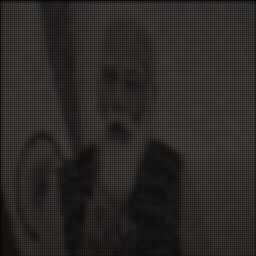

In [ ]:
cv2_imshow(prediction[0])


Original Image



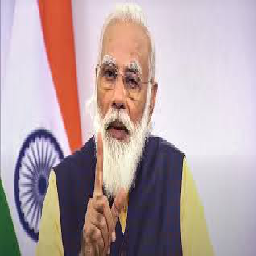


Input Image



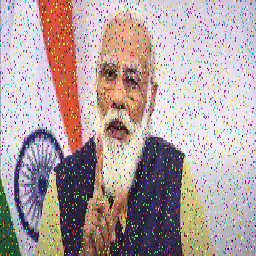


Denoised Image



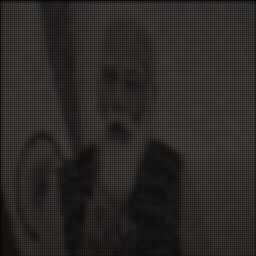


********************************************************

Original Image



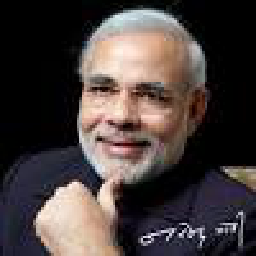


Input Image



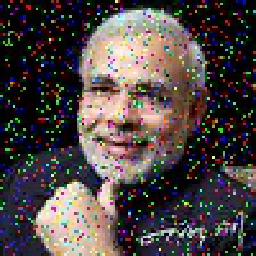


Denoised Image



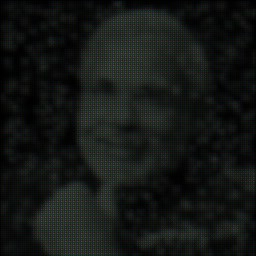


********************************************************

Original Image



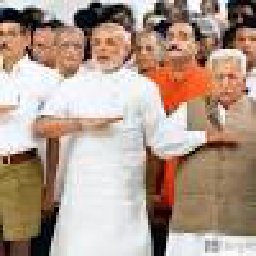


Input Image



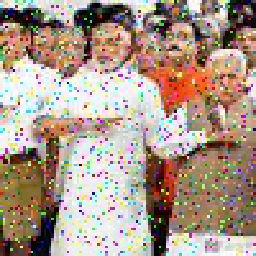


Denoised Image



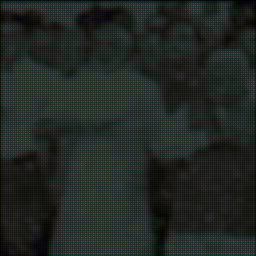


********************************************************


In [ ]:
for i in range(3):
  print('\nOriginal Image\n')
  img2=test[i]
  image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB )
  cv2_imshow(image2)
  print('\nInput Image\n')
  img=test_noise[i]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
  cv2_imshow(image)
  print('\nDenoised Image\n')
  img1=prediction[i]
  cv2_imshow(img1)
  print('\n********************************************************')

# Conclusion:
* Initially, we have used the MNIST dataset for building the autoencoder model. The noise to the images by randomly inserting some values in the image, which can reproduce the noise pattern. The we built the model using five encoders and two decoder with relu activation function and adam optimzer. The model wasn't able to reproduce the original denoised image.

* later we built a model using four encoding and three decoding layers to classify our own image dataset using the same activation function and optimizer.
* But the denoised images are not a very good approximation to the  original image.